In [18]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
csv_path = "housing.csv"  # Ensure the CSV is in the same directory as the notebook
df = pd.read_csv(r"C:\Users\ecoro\OneDrive\Documents\INST414_DataScienceTech\Assignment 6\housing.csv")

In [20]:
df.fillna(df.median(numeric_only=True), inplace=True)

df['average_rooms'] = df['total_rooms'] / df['households']

In [21]:
X = df[['median_income', 'average_rooms', 'latitude', 'longitude']]
y = df['median_house_value']

In [22]:
train_errors = []
test_errors = []

In [23]:
for depth in range(1, 11):
    
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    regressor.fit(X_train, y_train)

    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_errors.append(train_mae)
    test_errors.append(test_mae)
    
    print(f"max_depth = {depth} | Train MAE: {train_mae:.2f} | Test MAE: {test_mae:.2f}")

max_depth = 1 | Train MAE: 74274.09 | Test MAE: 75237.23
max_depth = 2 | Train MAE: 65230.48 | Test MAE: 66008.35
max_depth = 3 | Train MAE: 61198.10 | Test MAE: 61958.29
max_depth = 4 | Train MAE: 57035.30 | Test MAE: 57823.22
max_depth = 5 | Train MAE: 53288.79 | Test MAE: 54429.11
max_depth = 6 | Train MAE: 50377.65 | Test MAE: 52352.94
max_depth = 7 | Train MAE: 45339.30 | Test MAE: 47966.35
max_depth = 8 | Train MAE: 40951.97 | Test MAE: 44357.63
max_depth = 9 | Train MAE: 36301.43 | Test MAE: 42031.58
max_depth = 10 | Train MAE: 32172.99 | Test MAE: 39682.87


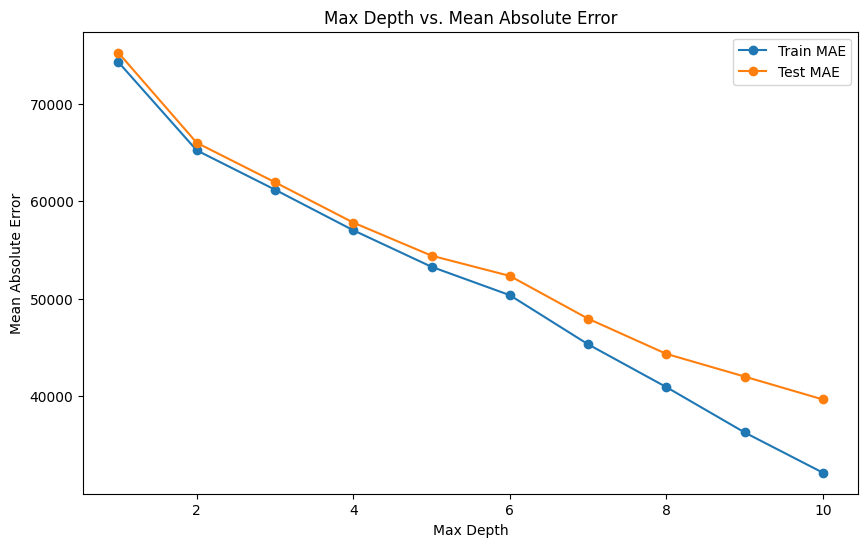

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_errors, label="Train MAE", marker="o")
plt.plot(range(1, 11), test_errors, label="Test MAE", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Mean Absolute Error")
plt.title("Max Depth vs. Mean Absolute Error")
plt.legend()
plt.show()

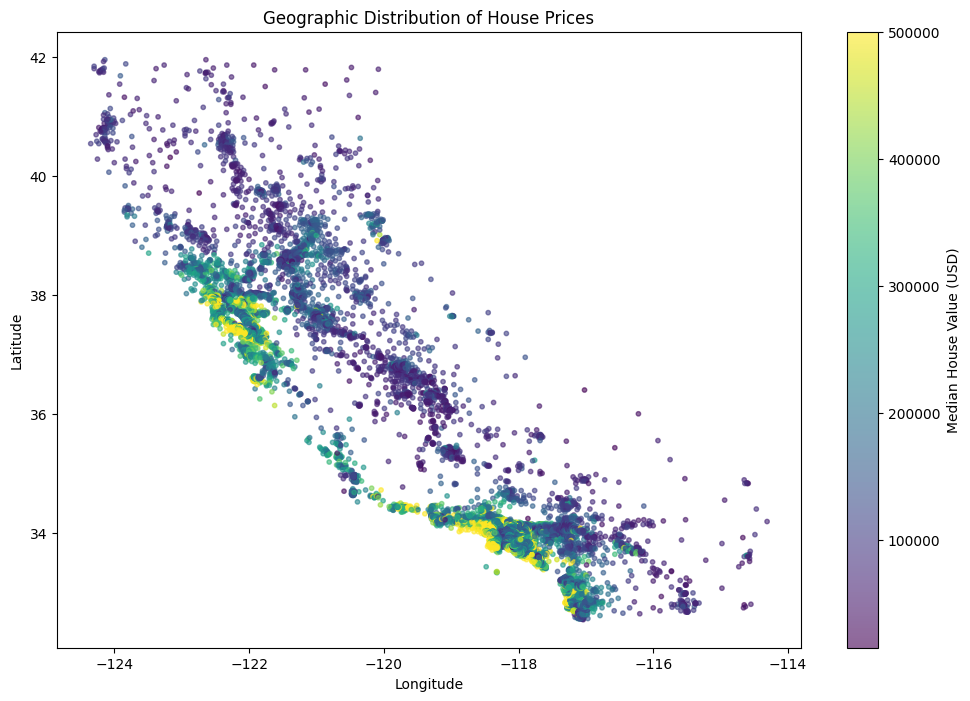

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['longitude'], df['latitude'], 
    c=df['median_house_value'], 
    cmap='viridis',  
    alpha=0.6, 
    s=10  
)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Median House Value (USD)')

plt.title('Geographic Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [30]:
optimal_depth = 7
model = DecisionTreeRegressor(max_depth=optimal_depth)
model.fit(X_train, y_train)

new_data = pd.DataFrame({
    'median_income': [8.5, 4.5], 
    'average_rooms': [6.2, 5.1],  
    'latitude': [37.85, 38.2],  
    'longitude': [-122.23, -122.1] 
})

inflation_factor = 1 + (141.52 / 100)

new_predictions = model.predict(new_data)

for i, (index, row) in enumerate(new_data.iterrows()):
    original_price = new_predictions[i]
    adjusted_price = original_price * inflation_factor
    print(f"House {i+1} Features:")
    print(f"  Median Income: {row['median_income']}") #in tens of thousands
    print(f"  Average Rooms: {row['average_rooms']}")
    print(f"  Latitude: {row['latitude']}")
    print(f"  Longitude: {row['longitude']}")
    print(f"  Predicted Price (1990): ${original_price:,.2f}")
    print(f"  Price adjusted for inflation (Dec 9, 2024): ${adjusted_price:,.2f}")
    print('-' * 40)


House 1 Features:
  Median Income: 8.5
  Average Rooms: 6.2
  Latitude: 37.85
  Longitude: -122.23
  Predicted Price (1990): $458,997.26
  Price adjusted for inflation (Dec 9, 2024): $1,108,570.19
----------------------------------------
House 2 Features:
  Median Income: 4.5
  Average Rooms: 5.1
  Latitude: 38.2
  Longitude: -122.1
  Predicted Price (1990): $155,904.11
  Price adjusted for inflation (Dec 9, 2024): $376,539.61
----------------------------------------
